In [26]:
%load_ext IPython.extensions.autoreload
%autoreload 2

The IPython.extensions.autoreload extension is already loaded. To reload it, use:
  %reload_ext IPython.extensions.autoreload


In [40]:
import sys

sys.path.append('../model')

from data import FinData
from preprocessing import train_valid_split
from model import CatboostFinModel

In [41]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime as dt

# from model.data import FinData
# from model.preprocessing import train_valid_split
# from ..model.model import CatboostFinModel

In [42]:
data = FinData("../datasets/T_yandex_10min.csv")

data.insert_shifts_norms()
data.insert_rolling_means([3, 6, 18])
data.insert_exp_rolling_means()
data.insert_stochastic_oscillator()
data.insert_high_low_diff()
data.insert_holidays()
data.insert_rsi()
data.insert_bollinger()
data.insert_random_prediction()

data.make_binary_class_target()
data.restrict_time_down_stupidly(months=12)

TypeError: StandartFeaturesMixin.insert_rolling_means() missing 1 required positional argument: 'windows_ma'

In [37]:
numeric = data.numeric_features

cat = data.cat_features

args = {"iterations" : 10000, 
        "depth" : 5, 
        "learning_rate" : 0.01, # тут слегка неадекватные параметры, которые можно менять 
        "use_best_model" : True, 
        "l2_leaf_reg" : 200,
        "loss_function" : 'CrossEntropy', 
        "eval_metric" : 'Accuracy', 
        "cat_features" : cat, 
        "random_state" : 42,
        "early_stopping_rounds" : 5000}


model = CatboostFinModel(args)
model.cross_validation(data.df, cat, n_samples=5)

fist_date: 2024-09-15 04:00:00 - last_date: 2024-11-15 04:00:00
const_acc: 0.5728643216080402
fist_date: 2024-08-14 04:00:00 - last_date: 2024-10-14 04:00:00
const_acc: 0.5742574257425742
fist_date: 2024-09-13 04:00:00 - last_date: 2024-11-13 04:00:00
const_acc: 0.6030150753768844
fist_date: 2024-08-04 07:00:00 - last_date: 2024-10-04 07:00:00
const_acc: 0.542713567839196
(199,)
On trial 4 with date 2024-08-04 00:00:00 got accuracy 0.592964824120603
fist_date: 2024-08-04 07:00:00 - last_date: 2024-10-04 07:00:00
const_acc: 0.542713567839196
fist_date: 2024-08-16 04:00:00 - last_date: 2024-10-16 04:00:00
const_acc: 0.4723618090452261
fist_date: 2024-08-24 04:00:00 - last_date: 2024-10-24 04:00:00
const_acc: 0.5276381909547738
fist_date: 2024-08-16 04:00:00 - last_date: 2024-10-16 04:00:00
const_acc: 0.4723618090452261
(199,)
On trial 3 with date 2024-08-16 00:00:00 got accuracy 0.5728643216080402
fist_date: 2024-08-04 07:00:00 - last_date: 2024-10-04 07:00:00
const_acc: 0.54271356783919

0.603715092877322

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


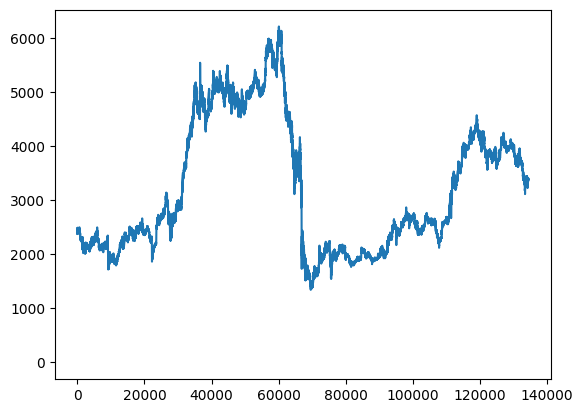

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool

model = CatBoostClassifier(
    iterations=500, depth=5,use_best_model=True, loss_function='CrossEntropy', eval_metric='Accuracy', verbose=False)

# Загрузка данных Iris
X = data.df.drop(columns="direction_binary")
y = data.df["direction_binary"]
# Инициализация модели логистической регрессии
# logreg = LogisticRegression(random_state=42)

# Определение количества признаков для исключения
n_features_to_select = 10

# Выполнение RFE
rfe = RFE(model, n_features_to_select, step=1)
X_rfe = rfe.fit_transform(X, y)

# Оценка модели с использованием кросс-валидации
scores = cross_val_score(model, X_rfe, y, scoring='accuracy', cv=5)

print("Точность модели после RFE (n_features_to_select = %d):" % n_features_to_select)
print("Mean Accuracy: %.3f" % scores.mean())

# Вывод выбранных признаков
print("Выбранные признаки:", rfe.support_)
print("Индексы выбранных признаков:", rfe.ranking_)
